In [1]:
import h5py

In [2]:
def load_stdata(fname):
    # print('fname:', fname)
    f = h5py.File(fname, 'r')
    data = f['data'][:]
    timestamps = f['date'][:]
    f.close()
    return data, timestamps

In [3]:
datas = []
for year in [13,14,15,16]:
    path = f"..\data\TaxiBJ\BJ{year}_M32x32_T30_InOut.h5"
    data, timestamps = load_stdata(path)
    datas.append(data)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
st_data = np.concatenate(datas)

In [6]:
st_data.shape

(22484, 2, 32, 32)

In [7]:
from einops import rearrange,reduce,repeat

In [8]:
reversed_st_data = rearrange(st_data,"n f h w -> f h w n")

In [9]:
reversed_st_data.shape

(2, 32, 32, 22484)

In [10]:
flow_direction, max_index_height, max_index_width, max_index = np.unravel_index(reversed_st_data.argmax(), reversed_st_data.shape)

In [11]:
T = 48
week = T*7
day = T*1
two_week_lenght = week
sequence_two_week = reversed_st_data[flow_direction,max_index_height,max_index_width,max_index-two_week_lenght:max_index+two_week_lenght]

In [12]:
2*two_week_lenght

672

In [13]:
max_index_height, max_index_width

(18, 24)

In [50]:
t = 2 
c = 6
time_slot = 0
close_sequence = [max_index-i for i in range(1,c+1)]
trend_sequence = [max_index - i*week for i in range(1,t+1)]

In [51]:
time_x =trend_sequence+ close_sequence + [time_slot]
y = reversed_st_data[flow_direction,max_index_height,max_index_width,][time_x]

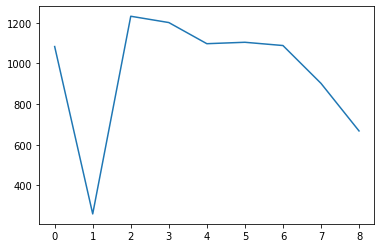

In [52]:
plt.plot(y)

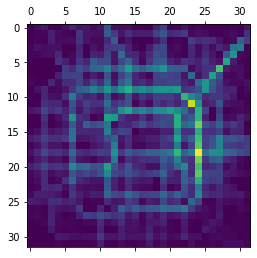

In [54]:
plt.matshow(reversed_st_data[flow_direction,:,:,0])



[0.5, 0.5063127958494479, 0.5126235794300751, 0.5189303410379688, 0.5252310760920887, 0.5315237876783748, 0.537806489073151, 0.5440772062390743, 0.5503339802870021, 0.5565748698973106, 0.5627979536943825, 0.5690013325681905, 0.5751831319371524, 0.5813415039466849, 0.5874746295981818, 0.5935807208034398, 0.599658022359889, 0.6057048138423194, 0.6117194114071615, 0.6177001695057384, 0.623645482503293, 0.6295537862009739, 0.6354235592583607, 0.6412533245144977, 0.6470416502058042, 0.6527871510796176, 0.6584884894025207, 0.6641443758629773, 0.6697535703681884, 0.6753148827354345, 0.6808271732785296, 0.6862893532903535, 0.6917003854227518, 0.6970592839654073, 0.7023651150255776, 0.7076169966108723, 0.7128140986174973, 0.7179556427266344, 0.7230409022118413, 0.7280692016605564, 0.7330399166129672, 0.7379524731216619, 0.7428063472356178, 0.747601064412199, 0.7523361988609284, 0.757011372822882, 0.7616262557896031, 0.7661805636654838, 0.7706740578775718, 0.7751065444367771, 0.7794778729544307,

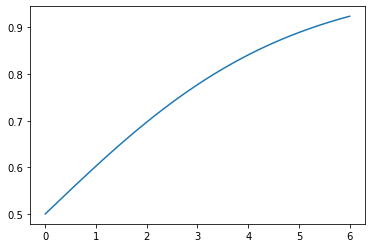

In [69]:
# correct solution:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference
import numpy as np
frac = []
for a in np.linspace(0,5,100):
    x = np.array([a,1.5*a])
    y = softmax(x)
    frac.append(y.max())

print(frac)
plt.plot(np.linspace(0,6,100),frac)

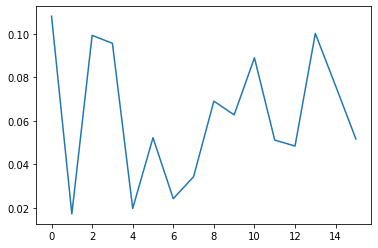

In [78]:
x = np.array([[[0.1081],
         [0.0173],
         [0.0993],
         [0.0957],
         [0.0198],
         [0.0523],
         [0.0243],
         [0.0344],
         [0.0691],
         [0.0628],
         [0.0890],
         [0.0512],
         [0.0485],
         [0.1002],
         [0.0761],
         [0.0517]]
])

plt.plot(x.reshape(-1))

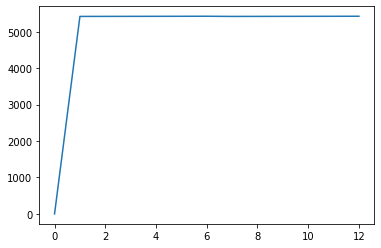

In [70]:
future_close_sequence = [max_index+i for i in range(1,c+1)]
future_trend_sequence = [max_index + i*week for i in range(1,t+1)]
time_x =trend_sequence+ close_sequence + [time_slot] +future_close_sequence + future_close_sequence
future = [time_slot] +future_close_sequence + future_close_sequence
plt.plot(future)
# plt.plot(time_x)

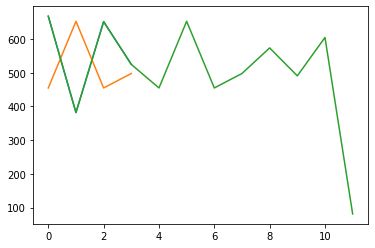

In [44]:
plt.plot(reversed_st_data[flow_direction,max_index_height,max_index_width,0:4*week:week])
plt.plot(reversed_st_data[flow_direction,max_index_height,max_index_width,4*week:8*week:week])
plt.plot(reversed_st_data[flow_direction,max_index_height,max_index_width,0:12*week:week])

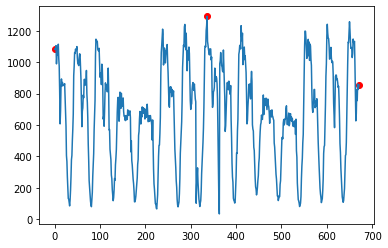

In [36]:
plt.plot(sequence_two_week)
plt.scatter(0,sequence_two_week[0],color="red")
plt.scatter(week,sequence_two_week[week],color="red")
plt.scatter(2*week-1,sequence_two_week[2*week-1],color="red")

In [10]:
location18 = reversed_st_data[0][18][18]
location18_19 = reversed_st_data[0][18][19]
location19_18 = reversed_st_data[0][19][18]
location19 = reversed_st_data[0][19][19]
location5 = reversed_st_data[0][5][5]

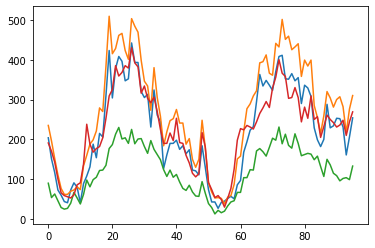

In [11]:
plt.plot(location18[:96],label="")
plt.plot(location18_19[:96])
plt.plot(location19_18[:96])
plt.plot(location19[:96])

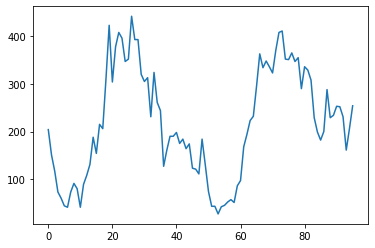

In [12]:
plt.plot(location18[:96],label="")

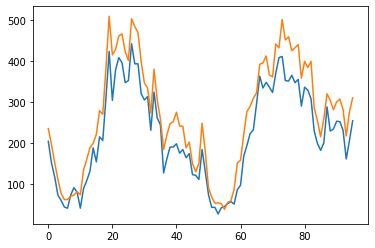

In [13]:
plt.plot(location18[:96],label="")
plt.plot(location18_19[:96])


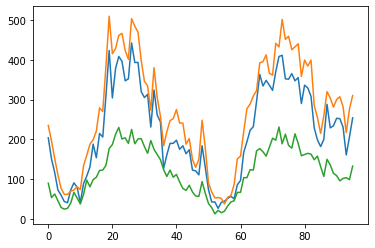

In [14]:
plt.plot(location18[:96],label="")
plt.plot(location18_19[:96])
plt.plot(location19_18[:96])

In [15]:
location18[0]

204.0

In [16]:
location18[0+48*7]

132.0

In [17]:
location18[0+48*7*2]

210.0

In [18]:
location18[0+48*7*3]

154.0

In [19]:
location18[0+48*7*6]

149.0

In [20]:
location18[0+48*]

SyntaxError: invalid syntax (<ipython-input-20-0d7fe951f033>, line 1)

In [ ]:
period = []
for i in range(5):
    flow = location18[0+48*i]
    period.append(flow)

In [ ]:
np.array(period).std()

In [ ]:
plt.plot(period)

In [ ]:
trend = []
for i in range(3):
    flow = location18[0+48*7*i]
    trend.append(flow)

In [ ]:
plt.plot(trend)